Intercept: 36.9373103135183, Slope: -5.33694140055705
Predicted mpg for a car with weight 5.5: 7.584132610454528
RMSE on test set: 3.532136132699143
R^2 on test set: 0.6879761857596267


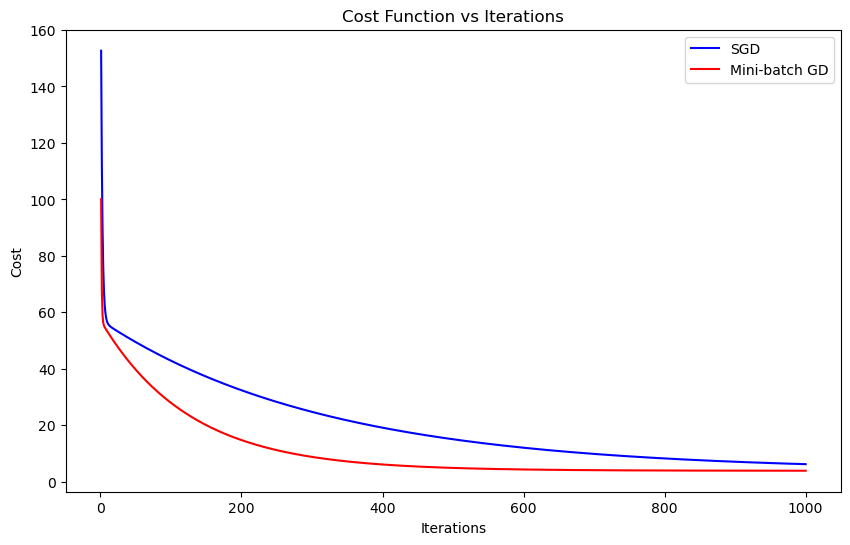

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
 

def myFnLinReg(x, y):
    
    X = np.c_[np.ones(x.shape[0]), x]
   
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta
 

mtcars = pd.read_csv("C:\\Users\\maths\\Downloads\\mtcars (1).csv")
 

x = mtcars['wt'].values.reshape(-1, 1) 
y = mtcars['mpg'].values  )
 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
 

theta = myFnLinReg(x_train, y_train)
intercept, slope = theta[0], theta[1]
 

print(f"Intercept: {intercept}, Slope: {slope}")
 

mpg_pred = intercept + slope * 5.5
print(f"Predicted mpg for a car with weight 5.5: {mpg_pred}")
 

x_test_with_intercept = np.c_[np.ones(x_test.shape[0]), x_test]  
y_pred = x_test_with_intercept.dot(theta)
 rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
 
print(f"RMSE on test set: {rmse}")
print(f"R^2 on test set: {r2}")
 

def sgd(x, y, learning_rate=0.01, epochs=1000):
    m = len(y)
    theta = np.zeros(2)
    x_bias = np.c_[np.ones(x.shape[0]), x]
    for epoch in range(epochs):
        gradients = -2/m * x_bias.T.dot(y - x_bias.dot(theta))
        theta -= learning_rate * gradients
    return theta
 
def mini_batch_gd(x, y, learning_rate=0.01, epochs=1000, batch_size=10):
    m = len(y)
    theta = np.zeros(2)
    x_bias = np.c_[np.ones(x.shape[0]), x]
    for epoch in range(epochs):
        for i in range(0, m, batch_size):
            x_batch = x_bias[i:i+batch_size]
            y_batch = y[i:i+batch_size]
            gradients = -2/batch_size * x_batch.T.dot(y_batch - x_batch.dot(theta))
            theta -= learning_rate * gradients
    return theta
 

theta_sgd = sgd(x_train, y_train)
theta_mbgd = mini_batch_gd(x_train, y_train)
 

def compute_cost(x, y, theta):
    m = len(y)
    x_bias = np.c_[np.ones(x.shape[0]), x]
    cost = np.sum((x_bias.dot(theta) - y) ** 2) / (2 * m)
    return cost
 
iterations = 1000
cost_sgd = [compute_cost(x_train, y_train, sgd(x_train, y_train, epochs=i)) for i in range(1, iterations+1)]
cost_mbgd = [compute_cost(x_train, y_train, mini_batch_gd(x_train, y_train, epochs=i)) for i in range(1, iterations+1)]
 

plt.figure(figsize=(10, 6))
plt.plot(range(1, iterations+1), cost_sgd, label="SGD", color='blue')
plt.plot(range(1, iterations+1), cost_mbgd, label="Mini-batch GD", color='red')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function vs Iterations')
plt.legend()
plt.show()